# Importing Stuff

In [3]:
!nvidia-smi

Sun Dec 13 16:14:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!pip install -qq simpletransformers

     |████████████████████████████████| 204kB 8.2MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 1.8MB 12.1MB/s 
     |████████████████████████████████| 2.9MB 36.9MB/s 
     |████████████████████████████████| 7.4MB 60.0MB/s 
     |████████████████████████████████| 317kB 57.9MB/s 
     |████████████████████████████████| 1.4MB 57.4MB/s 
     |████████████████████████████████| 1.1MB 54.9MB/s 
     |████████████████████████████████| 163kB 60.4MB/s 
     |████████████████████████████████| 102kB 15.2MB/s 
     |████████████████████████████████| 102kB 14.9MB/s 
     |████████████████████████████████| 133kB 61.9MB/s 
     |████████████████████████████████| 4.5MB 56.0MB/s 
     |████████████████████████████████| 112kB 52.1MB/s 
     |████████████████████████████████| 890kB 44.3MB/s 
     |████████████████████████████████| 71kB 12.3MB/s 
     |████████████████████████████████| 122kB 63.4MB/s

In [2]:
import pandas as pd
from simpletransformers.classification import ClassificationModel
import logging 


ModuleNotFoundError: ignored

# Preprocessing the Data

In [ ]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [ ]:
# Reading the data:
train = pd.read_csv("/content/drive/My Drive/Glue Labs/Abuse Model 16/Data/train.csv")
test = pd.read_csv("/content/drive/My Drive/Glue Labs/Abuse Model 16/Data/test.csv")

In [ ]:
train.drop(['Unnamed: 0'], axis=1, inplace = True)
test.drop(['Unnamed: 0'], axis=1, inplace = True)

# Model

In [ ]:
model = ClassificationModel('xlmroberta', 'xlm-roberta-large', 
                            args={'reprocess_input_data': True,
                                  'overwrite_output_dir': True,
                                  'train_batch_size': 20,
                                  'num_train_epochs': 2,'save_steps':False},
                             use_cuda=True)

INFO:filelock:Lock 139911856926224 acquired on /root/.cache/huggingface/transformers/4d7a1550c9ab8701667bc307a1213c040fcc06dc87a5e4994e72aecc0d7e0337.302e267433fe7c84959a639e9c7c555043daa4020c0daf311785b53de7b8685e.lock


INFO:filelock:Lock 139911856926224 released on /root/.cache/huggingface/transformers/4d7a1550c9ab8701667bc307a1213c040fcc06dc87a5e4994e72aecc0d7e0337.302e267433fe7c84959a639e9c7c555043daa4020c0daf311785b53de7b8685e.lock


INFO:filelock:Lock 139908917107904 acquired on /root/.cache/huggingface/transformers/4b3ca85a63804fb7cd317765d9de19ce6208ee0fc9691b209384ee7cfd9cb3b9.64b4693d874c772310b8acda9a1193cfade77d56795a9b488e612f198b68f6f7.lock


INFO:filelock:Lock 139908917107904 released on /root/.cache/huggingface/transformers/4b3ca85a63804fb7cd317765d9de19ce6208ee0fc9691b209384ee7cfd9cb3b9.64b4693d874c772310b8acda9a1193cfade77d56795a9b488e612f198b68f6f7.lock


Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.we

INFO:filelock:Lock 139908902785712 released on /root/.cache/huggingface/transformers/dc0198bb42e28700de2a550508894cf6c5202c38c7aff44b71a055950dfc2f99.00628a9eeb8baf4080d44a0abe9fe8057893de20c7cb6e6423cddbf452f7d4d8.lock


/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:286: UserWarning: use_multiprocessing automatically disabled as xlmroberta fails when using multiprocessing for feature conversion.
  f"use_multiprocessing automatically disabled as {model_type}"


In [ ]:
# First set:
model.train_model(train, output_dir="/content/drive/MyDrive/Glue Labs/Abuse Model 16/Model/c (XLM-R LARGE)")

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


INFO:simpletransformers.classification.classification_model: Training of xlmroberta model complete. Saved to /content/drive/MyDrive/Glue Labs/Abuse Model 16/Model/c (XLM-R LARGE).


(10002, 0.6501925101941737)

# Evaluating

In [ ]:
model.predict(['Fuck fuck fuck fuck'])

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


(array([0]), array([[-0.16711426, -0.29321289]]))

In [ ]:
# Results from first set of epochs:
result, model_outputs, wrong_predictions = model.eval_model(test)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
INFO:simpletransformers.classification.classification_model:{'mcc': 0.0, 'tp': 0, 'tn': 8476, 'fp': 0, 'fn': 7711, 'eval_loss': 0.692162492912513}


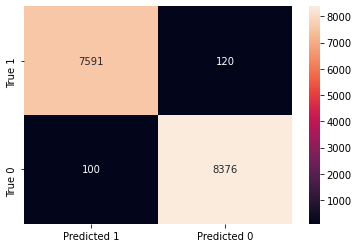

In [ ]:
import seaborn as sns
matrix = [[result['tp'], result['fn']],   [result['fp'], result['tn']]]
matrix = pd.DataFrame(matrix, columns = ['Predicted 1', 'Predicted 0'], index = ['True 1', 'True 0'])

sns.heatmap(matrix, annot=True, fmt = 'g')

In [ ]:
model = ClassificationModel('bert', '/content/drive/MyDrive/Glue Labs/Abuse Model 16/Model/b (M-BERT)/outputs')

In [ ]:
model.predict(['hain behenchod'])

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


(array([1]), array([[-3.52539062,  3.40039062]]))